# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [2]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import bokeh.plotting as bkp
from scipy import stats
from __future__ import print_function
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [3]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

****
## Preliminary Analysis

In [4]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

C:\ProgramData\Anaconda2\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


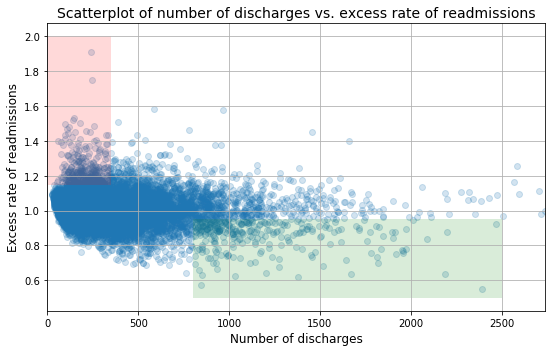

In [5]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

### A. Do you agree with the above analysis and recommendations? Why or why not?
Going by section,<br>
<b>A.</b> I would say there certain coorelation between number of discharges vs re-admission rate. But I would not go as far as saying it trends downward with increasing number of discharges. I see that there is an uptick around 2000 discharges, which could result into parabolic curve. And this may be because of the just number of paitents a facility has to deal with, even with all available resources. <br>
Above all it indicates some type of correlation but it cannot be used to draw causation conculsions.<br>

<b>B.</b>: Agree with the facts.<br>

**C**:
+ As stated earlier there is some upward trend at the end of the plot, so I would not completely agree that there is a significant correlation.<br>
+ Smaller hospital may be lacking the resources to deal with complete care but that could be just one of the reason. But there is no evidence of it from the data.<br>
+ Most importantly, it is reflected in the pearsons correlation co-efficent below between the two.

In [6]:
clean_hospital_read_df[['Number of Discharges','Excess Readmission Ratio']][81:-3].corr()

,Number of Discharges,Excess Readmission Ratio
Number of Discharges,1.000000,-0.093096
Excess Readmission Ratio,-0.093096,1.000000


**D**:
+ Requiring smaller hospitals to upgrade resources to improve quality, will increase cost which may have effects on other services or the facility itself. Plus we don't know if having more resources neccessarily increases quality of care.<br>
+ Consolidating facilities for larger capacity, may reduce the reach of care to remote areas. Also, re-admission rate cannot be the only reason for consolidation. There might be other factors affecting re-admission rate with varying degree of influance.

### B. Provide support for your arguments and your own recommendations with a statistically sound analysis:
#### 1. Setup an appropriate hypothesis test.
We want to test the conculsion that the higher discharge rate is soley based on the size of the facility. We want to see that the difference in re-admission rate for small and large facility is statistically significant. By doing this we can validate that weather the re-admission rate in both the cases are comparable.<br>

H<sub>0</sub>: There is a difference of re-admission rate between small facility and large facility.<br>
H<sub>a</sub>: There is no difference of re-admission rate between small facility and large facility.

#### 2. Compute and report the observed significance value (or p-value).

In [7]:
#from the code above looks like the first 80 rows contains 0s and last 3 rows are outliers for number of discharges.
print('Nulls in first 80 rows \n',clean_hospital_read_df[['Number of Discharges']][0:81])
print('Last 3 values looks like outliers for number of discharges \n',clean_hospital_read_df[['Number of Discharges']][-5:] )

Nulls in first 80 rows 
        Number of Discharges
16857                     0
14582                     0
15606                     0
15615                     0
14551                     0
15625                     0
15642                     0
15648                     0
15652                     0
15396                     0
14515                     0
15682                     0
14436                     0
15697                     0
14428                     0
15703                     0
15765                     0
14418                     0
14393                     0
15679                     0
14825                     0
14618                     0
15288                     0
14877                     0
14896                     0
14949                     0
14799                     0
14989                     0
14764                     0
15069                     0
...                     ...
16541                     0
13876                     0
13845                  

In [8]:
#ignoring above mentioned rows
hospital_readmission_discharge = clean_hospital_read_df[['Number of Discharges','Excess Readmission Ratio']][81:-3].sort_values(['Number of Discharges'])
small_hos_readm = hospital_readmission_discharge.loc[hospital_readmission_discharge['Number of Discharges']<=100,'Excess Readmission Ratio']
large_hos_readm = hospital_readmission_discharge.loc[hospital_readmission_discharge['Number of Discharges']>=1000,'Excess Readmission Ratio']

In [9]:
# Since we don't have the total population parameters, using t-statistics will yield better results.
# Using 2 sample test function from scipy package.
stats.ttest_ind(small_hos_readm,large_hos_readm, equal_var=False)

Ttest_indResult(statistic=7.4212188299234105, pvalue=4.4898257026612285e-13)

The exterme small p value indicates that the sample means are not comparable even with repeat experiment. Thus indicating that the initial conculsion of comparing them is off.  

#### 3. Report statistical significance for  α  = .01.
Even with a lower significance value of 0.01, the conculsion remains the same. As the p-value is so low that the probaility of both mean being equal is almost none. <br>
Any futher lowering of alpha will only mean accepting a very rarest case. 

#### 4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?

In [10]:
np.mean(small_hos_readm)-np.mean(large_hos_readm)

0.0430181072112068

The high value of t-statisitcs indicates there is no statistical significance between the means of small and large hospital's re-admission rates. Which means it is not rare to have a differenc of 0.043 between thier means of re-admission rate. So that cannot be conisdered for drawing any conculsions.<br>
As stated above the practical implication of such decission might be wide ranging from high cost consolidation, little to no access to healthcare for remoate location and little improvement in quality of healthcare in consolidated facilities.<br>

My recommendation would be to futher test how each factors affect quality, by how much and if it is really statistically significant. Things to consider, that there could be many data points missing that have an influence on the quality of care.
Lastly, since there is large number of facility with higher re-admission rate, which makes it a normal situation. I would re-consider the testing metric which is could point out outliers clearly.

#### 5. What are the advantages and disadvantages of using this plot to convey information?
Using scatter plot helps in 
- Understanding relation between two data sets.
- It is especially helpful in non-linear relationship.
- Easily identifying min, max and outliers in either directions.

A scatter plot can give a sense of relationship but it cannot be used to quantify the relationship.<br>
It can indicate relation between two datasets but that cannot be considered as cause and effect relationship.

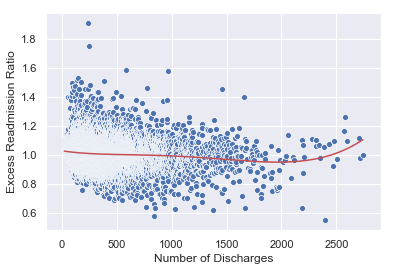

In [11]:
import numpy.polynomial.polynomial as poly
sns.set(color_codes=True)
coefs = poly.polyfit(x, y, 4)
x_new = np.linspace(x[0], x[-1], num=len(x))
ffit = poly.polyval(x_new, coefs)
plt.plot(x_new, ffit, color='r')
sns.scatterplot(x='Number of Discharges',y='Excess Readmission Ratio', data=hospital_readmission_discharge)
plt.show()